In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
# Random forest, svr, decision tree params adjust and theory randomforest
# testing many dataframe for each model
# eda for each solution

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training11.csv")
df.head()
corr=df.corr()

In [3]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.142333,0.153551,0.334565,0.524853,-0.315803,-0.472650,-0.499125,0.430345,0.332447,-0.033716,...,-0.354417,NaN,-0.131030,-0.050800,-0.019783,-0.048756,-0.249486,0.333237,NaN,1.000000
GrLivArea,0.120719,0.127222,0.008331,0.458779,-0.189161,-0.218697,-0.219837,0.314464,0.031921,-0.061258,...,-0.151926,NaN,-0.057856,-0.043154,0.007535,-0.002907,-0.103951,0.118027,NaN,0.607572
BsmtQual_Ex,-0.067336,0.110156,0.067300,0.348260,-0.213320,-0.159737,-0.176944,0.292843,0.219931,-0.043845,...,-0.294995,NaN,-0.055523,-0.015651,-0.027086,-0.035153,-0.231383,0.342712,NaN,0.530566
TotalBsmtSF,-0.249588,0.188220,0.075357,0.407939,-0.225604,-0.121166,-0.151733,0.281911,0.423329,0.085864,...,-0.222430,NaN,-0.033628,-0.063965,-0.074703,0.025350,-0.163098,0.229862,NaN,0.526490
GarageCars,-0.018763,0.150428,0.031077,0.494672,-0.234319,-0.088925,-0.128104,0.308173,0.161393,-0.066607,...,-0.213203,NaN,-0.114808,-0.109711,0.015857,-0.012673,-0.130096,0.257483,NaN,0.524947
OverallQual,0.168467,0.066253,-0.315555,1.000000,0.013580,0.245853,0.217332,0.300476,0.115412,-0.102320,...,-0.132284,NaN,-0.088225,-0.040849,-0.075064,-0.019867,-0.064936,0.266964,NaN,0.524853
GarageArea,-0.093239,0.183610,0.084616,0.432730,-0.215405,-0.131911,-0.167525,0.309273,0.214881,-0.039942,...,-0.235569,NaN,-0.102522,-0.106532,-0.014841,-0.017159,-0.141364,0.262419,NaN,0.524351
KitchenQual_Ex,-0.045219,0.075053,0.082089,0.310253,-0.121018,-0.163811,-0.169290,0.214144,0.184403,-0.036469,...,-0.210962,NaN,0.004694,-0.014103,-0.024406,-0.031675,-0.205273,0.250091,NaN,0.481160
1stFlrSF,-0.239974,0.213064,0.017884,0.329802,-0.200665,-0.126223,-0.145328,0.251188,0.333430,0.065461,...,-0.210962,NaN,-0.033945,-0.040522,0.046827,0.030706,-0.160864,0.182668,NaN,0.467500
Foundation_PConc,0.095374,0.006098,-0.093198,0.553635,-0.264221,0.063893,0.026830,0.159577,0.056796,-0.147740,...,-0.176319,NaN,-0.095768,0.007612,-0.043421,-0.035719,-0.139283,0.306872,NaN,0.443080


In [4]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [5]:
model=RandomForestRegressor()

In [6]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [7]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'BsmtQual_Ex', 'TotalBsmtSF', 'GarageCars',
       'OverallQual', 'GarageArea', 'KitchenQual_Ex', '1stFlrSF',
       'Foundation_PConc'],
      dtype='object')

In [8]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,22030.481575,35614.423043,0.834637
1,11,21644.448767,35300.866646,0.837536
2,12,22169.536096,35728.619385,0.833575
3,13,22784.909247,37416.422414,0.817480
4,14,22125.391438,36949.012486,0.822012
...,...,...,...,...
105,115,19266.334315,32155.311295,0.865199
106,116,19318.738048,32821.345917,0.859557
107,117,19107.164007,33309.033165,0.855353
108,118,19206.987945,33266.495250,0.855722


In [9]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
39,49,18479.377123,30787.729960,0.876422
38,48,18582.754075,32479.861855,0.862465
37,47,18616.556712,31870.375074,0.867578
29,39,18650.663870,31321.464641,0.872100
52,62,18656.588938,32022.933489,0.866307
...,...,...,...,...
1,11,21644.448767,35300.866646,0.837536
0,10,22030.481575,35614.423043,0.834637
4,14,22125.391438,36949.012486,0.822012
2,12,22169.536096,35728.619385,0.833575


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


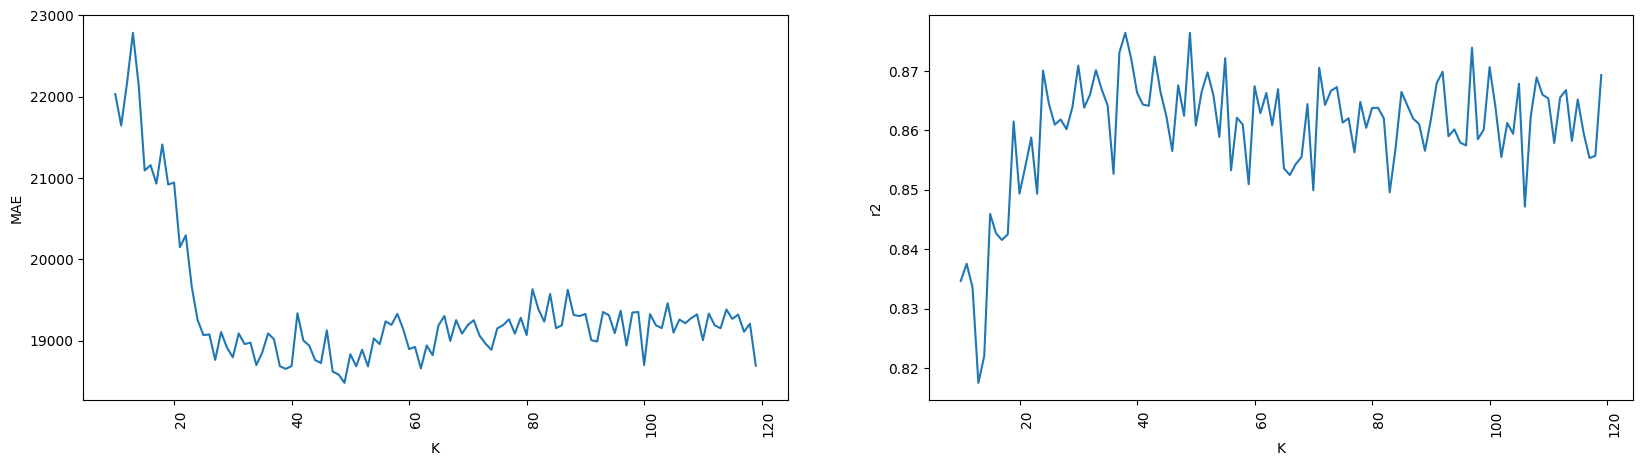

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [11]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               9.838685e-04
LotFrontage              4.121579e-04
LotArea                  1.359001e-02
OverallQual              6.131891e-04
OverallCond              4.291545e-04
                             ...     
SaleCondition_Family     2.350442e-04
SaleCondition_Normal     2.429358e-03
SaleCondition_Partial    1.656760e-03
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [12]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [15]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,19548.714384,31324.407047,0.872076
1,101,19861.682226,32808.952654,0.859663
2,102,19326.530890,30983.230010,0.874847
3,103,20531.752740,33563.729388,0.853132
4,104,20590.835308,33103.606554,0.857131
...,...,...,...,...
395,495,38338.070959,59796.926536,0.533830
396,496,38767.173493,59081.399672,0.544920
397,497,38608.096336,60039.997579,0.530033
398,498,38600.513527,59756.384671,0.534462


In [16]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
2,102,19326.530890,30983.230010,0.874847
0,100,19548.714384,31324.407047,0.872076
1,101,19861.682226,32808.952654,0.859663
14,114,20139.665959,32897.354153,0.858906
61,161,20186.777568,33546.004458,0.853287
...,...,...,...,...
392,492,38783.460274,59019.738681,0.545869
387,487,38806.693733,59552.217928,0.537638
393,493,38921.961952,60092.272667,0.529214
376,476,39052.414075,59972.634681,0.531087


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


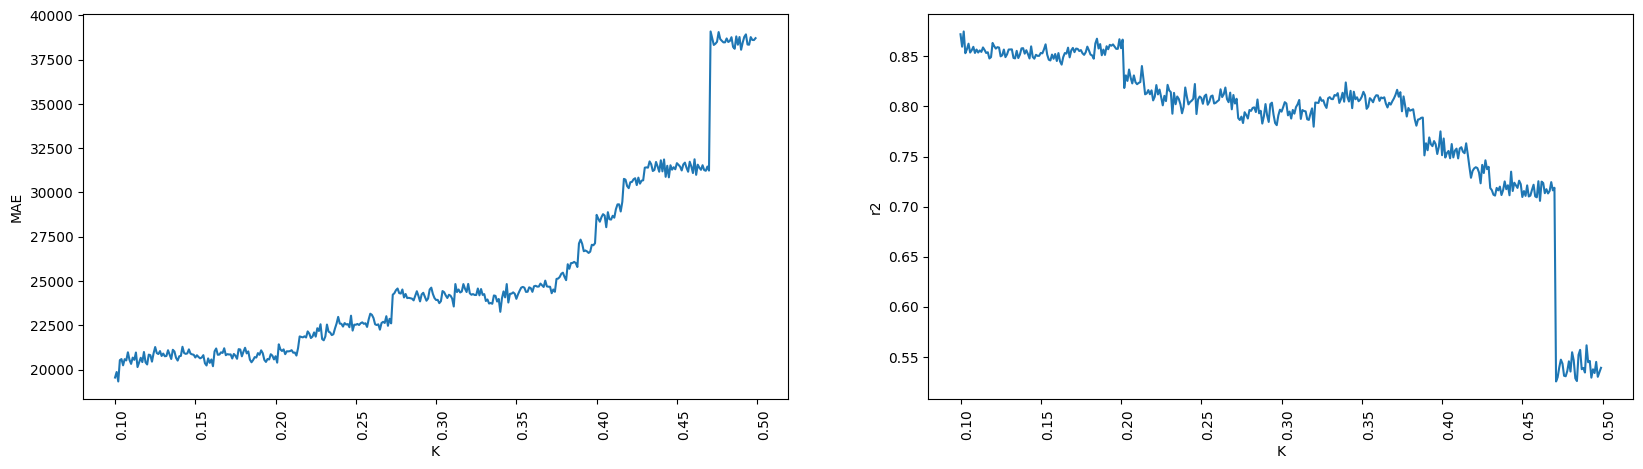

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


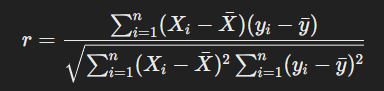

### Using numpy

In [18]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [19]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.5248525198657468


In [20]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['GrLivArea', 0.6075721273224745]]

### Using sklearn

In [21]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'BsmtQual_Ex'], dtype=object)

In [22]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,22822.277158,35556.876114,0.835171
1,6,22673.485377,36944.876350,0.822051
2,7,22143.311747,34989.084586,0.840393
3,8,22134.019281,36757.988689,0.823847
4,9,21899.514966,35842.146438,0.832516
...,...,...,...,...
110,115,19079.205514,32377.312368,0.863332
111,116,18952.394932,31746.180351,0.868608
112,117,18973.095719,32121.834185,0.865480
113,118,18846.877055,31537.365414,0.870331


In [23]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
24,29,18323.974555,31804.017502,0.868129
48,53,18437.928527,30388.206359,0.879608
38,43,18475.989589,31516.340270,0.870504
32,37,18560.125377,31020.351046,0.874547
25,30,18574.415651,32097.720866,0.865682
...,...,...,...,...
3,8,22134.019281,36757.988689,0.823847
2,7,22143.311747,34989.084586,0.840393
1,6,22673.485377,36944.876350,0.822051
6,11,22779.487192,36185.150081,0.829295


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


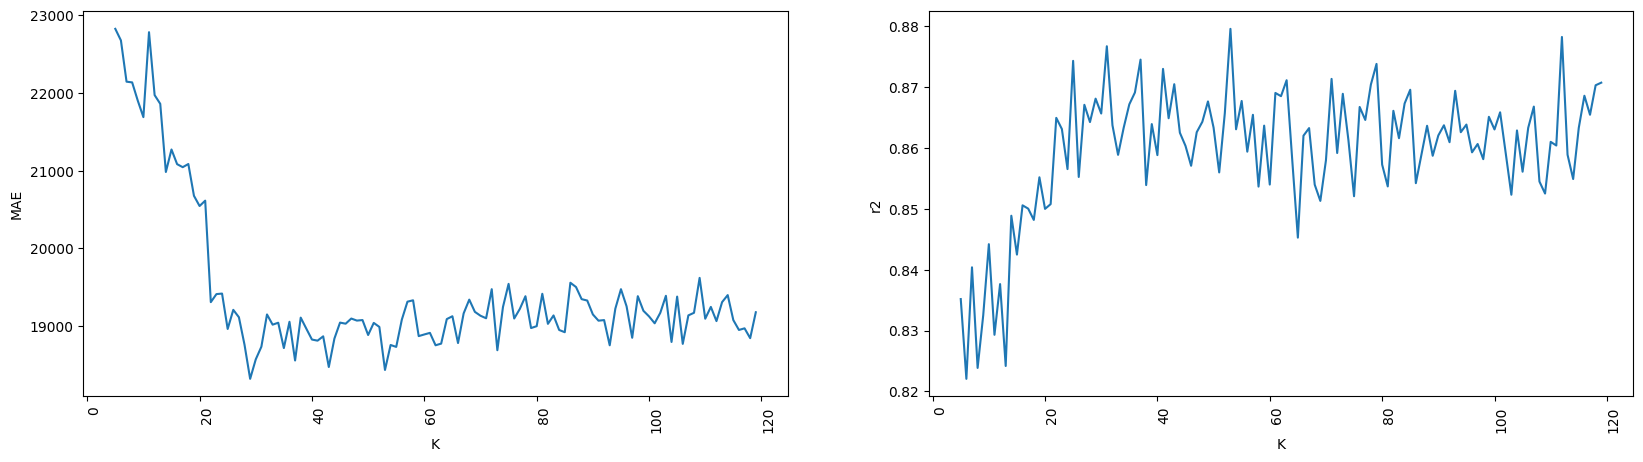

In [24]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

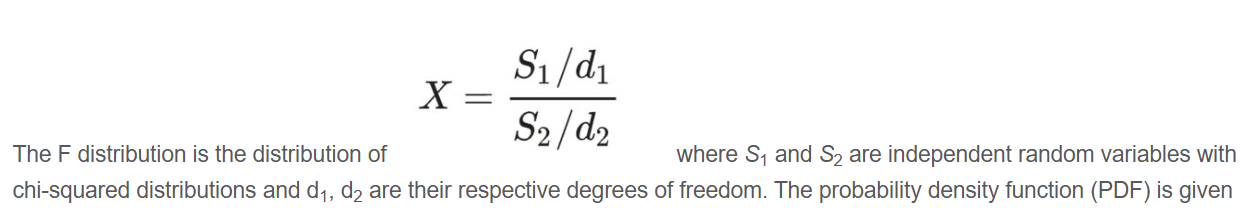

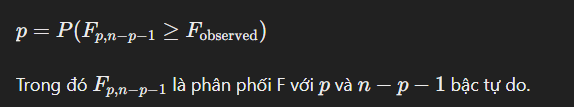

In [25]:
from sklearn.feature_selection import f_regression

In [26]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,23701.600822,37489.478195,0.816766
1,6,22982.211336,36600.374687,0.825355
2,7,21808.283253,32126.203880,0.865443
3,8,20023.436336,30824.355293,0.876128
4,9,19969.854418,30736.638320,0.876832
...,...,...,...,...
110,115,18890.524966,30185.392644,0.881210
111,116,18026.948390,29307.508672,0.888019
112,117,18770.740377,31031.928827,0.874454
113,118,18368.826952,30419.461255,0.879361


In [27]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
41,46,17614.481575,28800.766037,0.891858
38,43,17681.105445,28861.195785,0.891404
36,41,17683.712089,28969.309063,0.890589
42,47,17807.259418,28966.439752,0.890610
43,48,17924.622260,29040.770146,0.890048
...,...,...,...,...
4,9,19969.854418,30736.638320,0.876832
3,8,20023.436336,30824.355293,0.876128
2,7,21808.283253,32126.203880,0.865443
1,6,22982.211336,36600.374687,0.825355


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


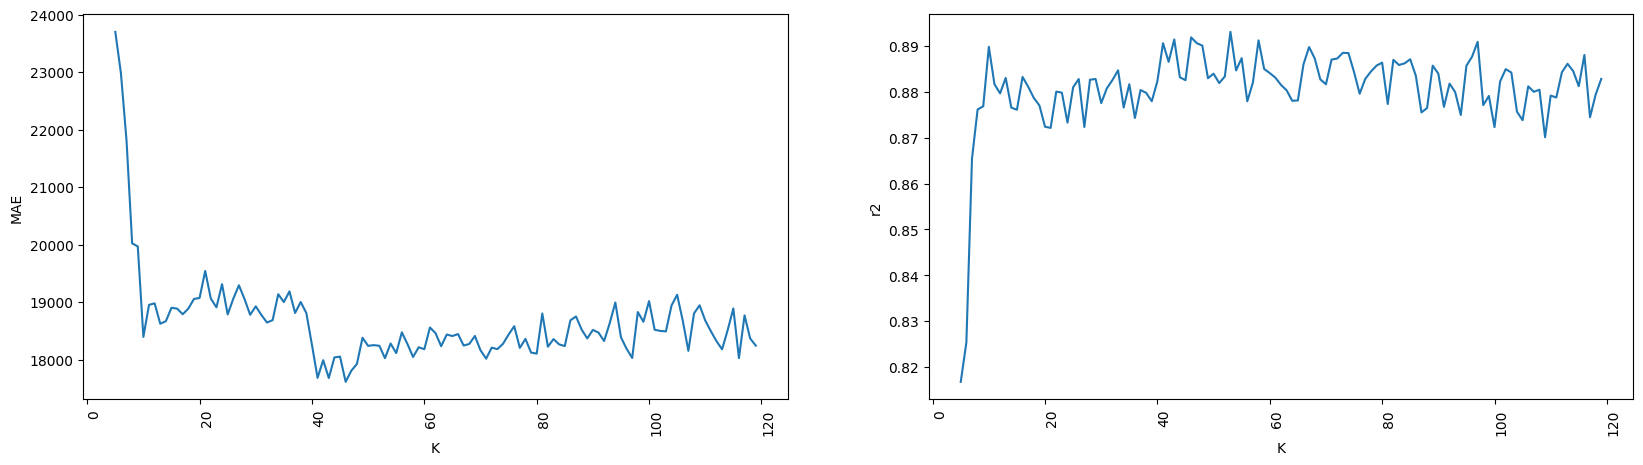

In [28]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

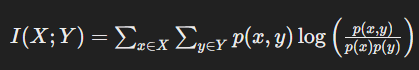

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

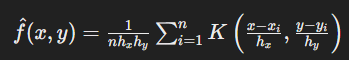

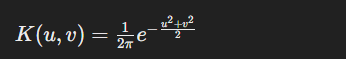

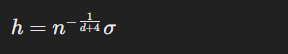

In [29]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,28200.614760,43542.952922,0.752815
1,6,28310.409966,43668.308442,0.751390
2,7,27530.948151,41002.220934,0.780820
3,8,27766.249658,40921.330115,0.781684
4,9,27090.888459,40461.080001,0.786567
...,...,...,...,...
110,115,18656.612808,30873.659659,0.875731
111,116,18374.582295,30105.367575,0.881839
112,117,18386.426849,29730.849136,0.884761
113,118,18411.176575,30659.247834,0.877451


In [32]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
90,95,18261.785582,29727.572561,0.884786
83,88,18352.186130,29771.940082,0.884442
107,112,18362.599452,30162.257359,0.881392
106,111,18364.788014,29668.907761,0.885240
111,116,18374.582295,30105.367575,0.881839
...,...,...,...,...
5,10,27208.071130,40219.456524,0.789109
2,7,27530.948151,41002.220934,0.780820
3,8,27766.249658,40921.330115,0.781684
0,5,28200.614760,43542.952922,0.752815


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_10884\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


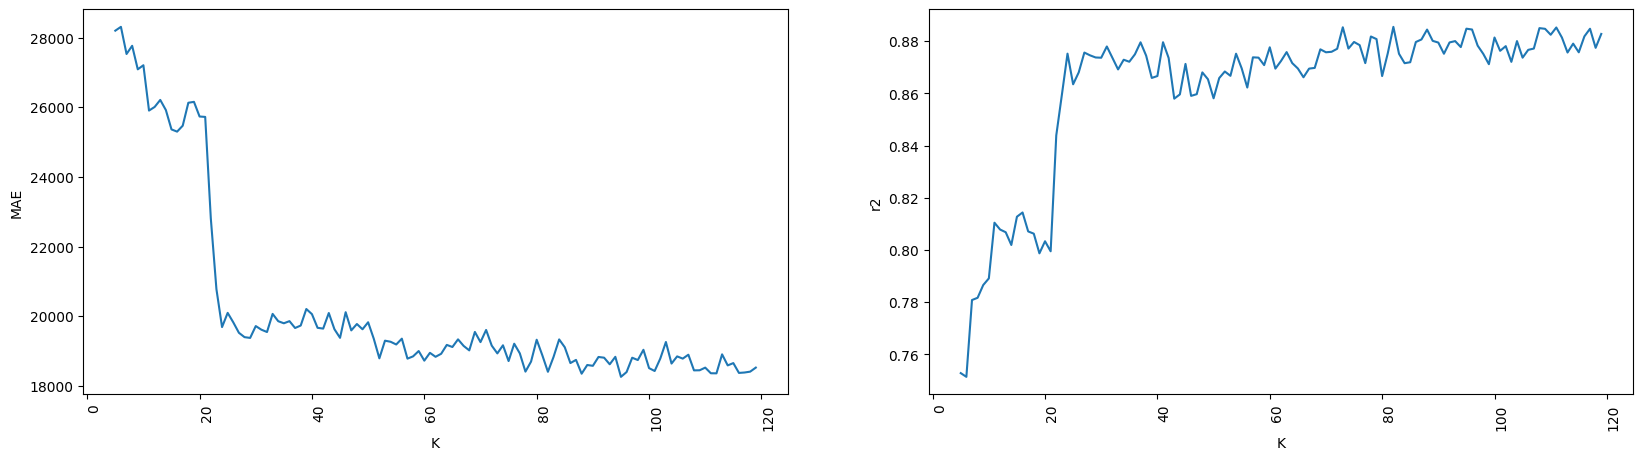

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [35]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,22822.277158,35556.876114,0.835171
1,6,22673.485377,36944.876350,0.822051
2,7,22143.311747,34989.084586,0.840393
3,8,22134.019281,36757.988689,0.823847
4,9,21899.514966,35842.146438,0.832516
...,...,...,...,...
110,115,19079.205514,32377.312368,0.863332
111,116,18952.394932,31746.180351,0.868608
112,117,18973.095719,32121.834185,0.865480
113,118,18846.877055,31537.365414,0.870331


In [36]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,23701.600822,37489.478195,0.816766
1,6,22982.211336,36600.374687,0.825355
2,7,21808.283253,32126.203880,0.865443
3,8,20023.436336,30824.355293,0.876128
4,9,19969.854418,30736.638320,0.876832
...,...,...,...,...
110,115,18890.524966,30185.392644,0.881210
111,116,18026.948390,29307.508672,0.888019
112,117,18770.740377,31031.928827,0.874454
113,118,18368.826952,30419.461255,0.879361


In [37]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,28200.614760,43542.952922,0.752815
1,6,28310.409966,43668.308442,0.751390
2,7,27530.948151,41002.220934,0.780820
3,8,27766.249658,40921.330115,0.781684
4,9,27090.888459,40461.080001,0.786567
...,...,...,...,...
110,115,18656.612808,30873.659659,0.875731
111,116,18374.582295,30105.367575,0.881839
112,117,18386.426849,29730.849136,0.884761
113,118,18411.176575,30659.247834,0.877451


In [38]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,22822.277158,35556.876114,0.835171,23701.600822,37489.478195,0.816766
1,6,22673.485377,36944.876350,0.822051,22982.211336,36600.374687,0.825355
2,7,22143.311747,34989.084586,0.840393,21808.283253,32126.203880,0.865443
3,8,22134.019281,36757.988689,0.823847,20023.436336,30824.355293,0.876128
4,9,21899.514966,35842.146438,0.832516,19969.854418,30736.638320,0.876832
...,...,...,...,...,...,...,...
110,115,19079.205514,32377.312368,0.863332,18890.524966,30185.392644,0.881210
111,116,18952.394932,31746.180351,0.868608,18026.948390,29307.508672,0.888019
112,117,18973.095719,32121.834185,0.865480,18770.740377,31031.928827,0.874454
113,118,18846.877055,31537.365414,0.870331,18368.826952,30419.461255,0.879361


In [39]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,22822.277158,35556.876114,0.835171,23701.600822,37489.478195,0.816766,28200.614760,43542.952922,0.752815
1,6,22673.485377,36944.876350,0.822051,22982.211336,36600.374687,0.825355,28310.409966,43668.308442,0.751390
2,7,22143.311747,34989.084586,0.840393,21808.283253,32126.203880,0.865443,27530.948151,41002.220934,0.780820
3,8,22134.019281,36757.988689,0.823847,20023.436336,30824.355293,0.876128,27766.249658,40921.330115,0.781684
4,9,21899.514966,35842.146438,0.832516,19969.854418,30736.638320,0.876832,27090.888459,40461.080001,0.786567
...,...,...,...,...,...,...,...,...,...,...
110,115,19079.205514,32377.312368,0.863332,18890.524966,30185.392644,0.881210,18656.612808,30873.659659,0.875731
111,116,18952.394932,31746.180351,0.868608,18026.948390,29307.508672,0.888019,18374.582295,30105.367575,0.881839
112,117,18973.095719,32121.834185,0.865480,18770.740377,31031.928827,0.874454,18386.426849,29730.849136,0.884761
113,118,18846.877055,31537.365414,0.870331,18368.826952,30419.461255,0.879361,18411.176575,30659.247834,0.877451


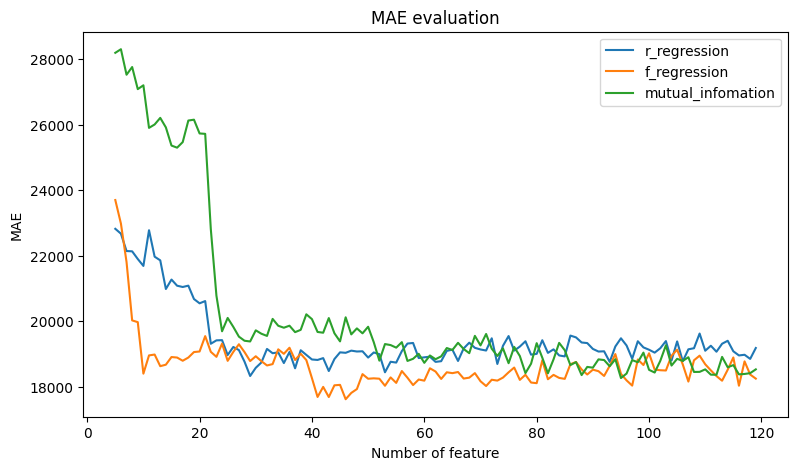

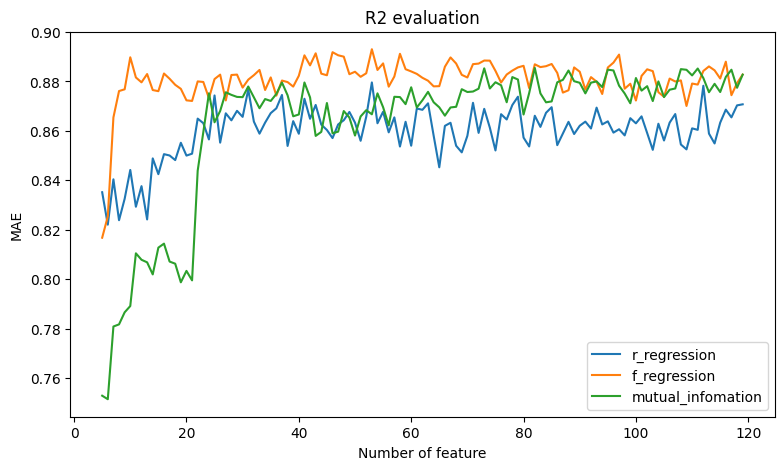

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()